In [1]:
import model
import dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re

In [2]:
keyboard_model = model.keyboard_detection_net()
keyboard_model.load_model('best_keyboard_model.tar')

Trying to load model from best_keyboard_model.tar ...
done


In [3]:
X = dataset.load_all_data()

# of X_train: 90089
# of X_test: 3820
# of X_val: 4949


1 coordinate has been found
2 coordinate has been found
3 coordinate has been found
4 coordinate has been found
5 coordinate has been found
6 coordinate has been found
7 coordinate has been found
8 coordinate has been found
9 coordinate has been found
10 coordinate has been found
11 coordinate has been found
12 coordinate has been found
13 coordinate has been found
14 coordinate has been found
15 coordinate has been found
16 coordinate has been found
17 coordinate has been found
18 coordinate has been found
19 coordinate has been found
20 coordinate has been found
21 coordinate has been found
22 coordinate has been found
23 coordinate has been found
24 coordinate has been found
25 coordinate has been found
26 coordinate has been found
27 coordinate has been found
28 coordinate has been found
29 coordinate has been found
30 coordinate has been found
31 coordinate has been found
32 coordinate has been found
33 coordinate has been found
34 coordinate has been found
35 coordinate has been 

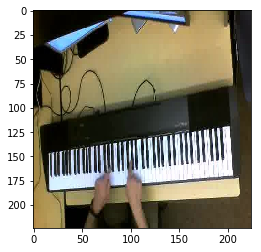

In [10]:
for idx in range (1,61):
    for x in X[f'X_train']:   
        if x.split('/')[2] == str(idx):
            x = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
            x = cv2.resize(x, (224, 224), interpolation=cv2.INTER_CUBIC)
            plt.imshow(x)
            x = np.transpose(x, [2, 0, 1])
            x = np.reshape(x, [1, 3, 224, 224])
            y = keyboard_model.evaluate(x)
            np.save(f'dataset/X_train/{idx}/coor.npy', y[0])
            print (str(idx) + ' coordinate has been found' )
            break

1 coordinate has been found
2 coordinate has been found
3 coordinate has been found
4 coordinate has been found
5 coordinate has been found


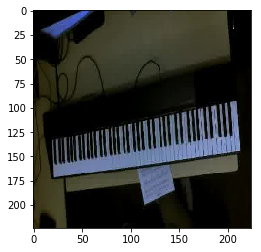

In [13]:
for idx in range (1,6):
    for x in X[f'X_val']:   
        if x.split('/')[2] == str(idx):
            x = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
            x = cv2.resize(x, (224, 224), interpolation=cv2.INTER_CUBIC)
            plt.imshow(x)
            x = np.transpose(x, [2, 0, 1])
            x = np.reshape(x, [1, 3, 224, 224])
            y = keyboard_model.evaluate(x)
            np.save(f'dataset/X_val/{idx}/coor.npy', y[0])
            print ( str(idx) + ' coordinate has been found' )
            break

1 coordinate has been found
2 coordinate has been found
3 coordinate has been found


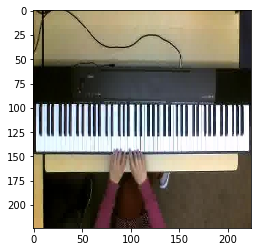

In [15]:
for idx in range (1,4):
    for x in X[f'X_test']:   
        if x.split('/')[2] == str(idx):
            x = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
            x = cv2.resize(x, (224, 224), interpolation=cv2.INTER_CUBIC)
            plt.imshow(x)
            x = np.transpose(x, [2, 0, 1])
            x = np.reshape(x, [1, 3, 224, 224])
            y = keyboard_model.evaluate(x)
            np.save(f'dataset/X_test/{idx}/coor.npy', y[0])
            print ( str(idx) + ' coordinate has been found' )
            break

In [ ]:
import time
num = 0
prev_time = time.time()
for _ in ['train', 'val', 'test']:
    for x in X[f'X_{_}']:
        root, dir_1, dir_2, pic = x.split('/')
        coor = np.load (root+'/'+dir_1+'/'+dir_2+'/coor.npy')
        image = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC)
        keyboard = dataset.get_standardized_keyboard(image, coor)
        cv2.imsave()
        num += 1
        if (num % 1000 == 0):
            curr_time = time.time()
            print(num)
            print('\n time consumed: '+ str(curr_time - prev_time))
            prev_time = curr_time

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


1000

 time consumed: 2000.777846813202
2000

 time consumed: 5921.8189470767975
